# Исследование объявлений о продаже квартир

**Описание проекта**: В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

**Цель исследования**: Необходимо провести исследовательский анализ данных и установить параметры, влияющие на цену объектов. 

**Ход исследования:**

- *Шаг 1.* Загрузка данных
- *Шаг 2.* Предобработка данных
- *Шаг 3.* Добавление новых данных 
- *Шаг 4.* Исследовательский анализ данных
- *Шаг 5.* Выводы

**Общий вывод**: Исследовательский анализ данных сервиса Яндекс Недвижимость позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

**Описание данных**

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
- `balcony` — число балконов;
- `ceiling_height` — высота потолков (м);
- `cityCenters_nearest` — расстояние до центра города (м);
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
- `first_day_exposition` — дата публикации;
- `floor` — этаж;
- `floors_total` — всего этажей в доме;
- `is_apartment` — апартаменты (булев тип);
- `kitchen_area` — площадь кухни в квадратных метрах (м²);
- `last_price` — цена на момент снятия с публикации;
- `living_area` — жилая площадь в квадратных метрах (м²);
- `locality_name` — название населённого пункта;
- `open_plan` — свободная планировка (булев тип);
- `parks_around3000` — число парков в радиусе 3 км;
- `parks_nearest` — расстояние до ближайшего парка (м);
- `ponds_around3000` — число водоёмов в радиусе 3 км;
- `ponds_nearest` — расстояние до ближайшего водоёма (м);
- `rooms` — число комнат;
- `studio` — квартира-студия (булев тип);
- `total_area` — общая площадь квартиры в квадратных метрах (м²);
- `total_images` — число фотографий квартиры в объявлении.

## Откроем файл с данными и изучим общую информацию

In [1]:
# Импортируем библиотеки, которые понадобятся для работы над проектом. 

# для датафрейма 
import pandas as pd
import numpy as np
from datetime import datetime, date, time

# для визуализации 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
# Считаем данные из csv-файла в датафрейм и сохраните в переменную data. 

try:
    data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
# Выводим первые 20 строчек датафрейма data на экран.

pd.set_option('display.max_columns', None)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# Выводим основную информацию о датафрейме с помощью метода info().

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Комментарий**: Согласно представленным данным мы видим, что в датафрейма всего 23699 записи. В нем представлены разные типы данных: логические (bool - 2), числовые двух типов (float64 - 14 и int64 - 3), текстовые и другие (object - 3). При этом 14 колонок имеют пропуски: 'ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'. На этапе предобработки будет неоходимо решить вопрос по формату работы с этими пропусками.  

In [5]:
# Выведем название всех колонок отдельно

data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
# Выберем все числовые столбцы из таблицы и проверим результат. 

data_number = data.select_dtypes(include='number')
data_number.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_images         23699 non-null  int64  
 1   last_price           23699 non-null  float64
 2   total_area           23699 non-null  float64
 3   rooms                23699 non-null  int64  
 4   ceiling_height       14504 non-null  float64
 5   floors_total         23613 non-null  float64
 6   living_area          21796 non-null  float64
 7   floor                23699 non-null  int64  
 8   kitchen_area         21421 non-null  float64
 9   balcony              12180 non-null  float64
 10  airports_nearest     18157 non-null  float64
 11  cityCenters_nearest  18180 non-null  float64
 12  parks_around3000     18181 non-null  float64
 13  parks_nearest        8079 non-null   float64
 14  ponds_around3000     18181 non-null  float64
 15  ponds_nearest        9110 non-null  

**Вывод**: 

При первичном поверхностном изучении датафрейма можно сделать ряд выводов. 
1. В датафрейма  23699 записи, представленые разными типами данных: bool, float64, int64, object. При этом 14 колонок имеют пропуски
2. Представленные диаграммы в большей степени соответствуют формату распределения Пуассона или нормальному распределению. Несколько нестандартно выглядят гистограммы для столбцов 'balcony', 'last_price', 'ceiling_height', в дальшейшем необходимо посмотреть эти данные более детально.

## Выполним предобработку данных

### Обработка пропусков

In [8]:
#Выведем количество пропущенных значений для каждого столбца.

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Комментарий**: Cтолбцы с пропущенными значениями хранят следующие данные: 

1. ceiling_height — данные о высоте потолков (м).
2. floors_total — данные о том сколько всего этажей в доме.
3. living_area — данные о жилой площади в квадратных метрах (м²).
4. is_apartment — данные о том апартаменты это или нет (булев тип).
5. kitchen_area — данные о площади кухни в квадратных метрах (м²).
6. balcony — данные о числе балконов.
7. locality_name  — данные о названии населённого пункта.
8. airports_nearest  — данные о расстоянии до ближайшего аэропорта в метрах (м).
9. cityCenters_nearest — данные о расстоянии до центра города (м).
10. parks_around3000 — данные о числе парков в радиусе 3 км.
11. parks_nearest — данные о расстоянии до ближайшего парка (м).
12. ponds_around3000 — данные о числе водоёмов в радиусе 3 км.
13. ponds_nearest — данные о расстоянии до ближайшего водоёма (м).
14. days_exposition — данные о том сколько дней было размещено объявление (от публикации до снятия).


#### Работа со столбцом 'ceiling_height' 

In [9]:
# Выведем данные по столбцу 'ceiling_height' 

print('Минимальная высота потолков:', data['ceiling_height'].min())
print('Максимальная высота потолков:', data['ceiling_height'].max())
print('Количество пропусков:',data['ceiling_height'].isna().sum())
print(data['ceiling_height'].sort_values().unique())

Минимальная высота потолков: 1.0
Максимальная высота потолков: 100.0
Количество пропусков: 9195
[  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3.06   3.07   3.08   3.09   3.1    3.11   3.12   3.13   3.14   3.15
   3.16   3.17   3.18   3.2    3.21   3.22   3.23   3.24   3.25   3.26
   3.27   3.28   3.29   3.3    3.31   3.32   3.33   3.34   3.35   3.36
   3.37   3.38   3.39   3.4    3.42   3.43   3.44   3.45   3.46   3.47
   3.48   3.49   3.5    3.51   3.52   3.53   3.54   3.55   3.56   3.57
   3.58   3.59   3.6    3.62   3.63   3.65   3.66   

**Комментарий**: Потолки меньше 2 м и больше 10 м выглядят очень странно. Вероятно, в данных есть какая-то ошибка. На этом этапе пропуски в высоте потолков можно заменить медианным значением, так как на среднее значение могут повлиять имеющиеся выбросы в 1 и 100 м. В зависимости от особенностей дома высота потолков варьируется в среднем от 2,5 до 4 м.

In [10]:
# Посчитаем медианную высоту потолков в домах

data['ceiling_height'].median()

2.65

In [11]:
# Заменим пропущенные значения в столбце 'ceiling_height' медианным
   
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
    

In [12]:
# Проверим количество пропусков после заполнения

data['ceiling_height'].isna().sum()

0

#### Работа со столбцом 'floors_total' 

In [13]:
# Выведем данные по столбцу 'floors_total' 

print('Количество пропусков:', data['floors_total'].isna().sum())
print(data['floors_total'].sort_values().unique())

Количество пропусков: 86
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 33. 34. 35. 36. 37. 52. 60.
 nan]


**Комментарий**: Дома в выборке представлены разной высоты, как малоэтажные, так и высотки. Для заполнения пропуска в таких данных также можно использовать медианное значение.

In [14]:
# Вычисляем медианное значение для столбца 'floors_total'
median_floors_total = data['floors_total'].median()

# Заполняем пропуски медианным значением
data.loc[data['floors_total'].isna(), 'floors_total'] = median_floors_total

# Проверяем условие и заменяем значения, если необходимо       
data.loc[data['floors_total'] < data['floor'], 'floors_total'] = data['floor']   

In [15]:
# Проверим количество пропусков после заполнения

data['floors_total'].isna().sum()

0

#### Работа со столбцами 'living_area'  и  'kitchen_area' 


In [16]:
# Выведем данные по столбцу 'living_area' 

print('Минимальная жилая площадь:', data['living_area'].min())
print('Максимальная жилая площадь:', data['living_area'].max())
print('Количество пропусков:', data['living_area'].isna().sum())


Минимальная жилая площадь: 2.0
Максимальная жилая площадь: 409.7
Количество пропусков: 1903


In [17]:
# Выведем данные по столбцу 'kitchen_area' 

print('Минимальная площадь кухни:', data['kitchen_area'].min())
print('Максимальная площадь кухни:', data['kitchen_area'].max())
print('Количество пропусков:', data['kitchen_area'].isna().sum())


Минимальная площадь кухни: 1.3
Максимальная площадь кухни: 112.0
Количество пропусков: 2278


**Комментарий**: Пропусков в данных довольно много, но заполнить их медианным значением будет не совсем корректно. Жилая площадь в 2 кв.м также выглядит очень странно, возможно, в данных есть ошибка или площадь квартир-студий распределена не совсем корректно. В датафрейме также есть столбец `total_area` (общая площадь квартиры), в котором пропусков нет. Предположим, что жилая площадь может быть вычислена как разность значений `total_area` и `kitchen_area`, а площадь кухни как разность `total_area` и `living_area`. Здесь важно проверить совпадают ли пропуски в столбцах `kitchen_area` и `living_area`. Кроме того в датафрейме есть столбец `studio`, в котором нет пропусков и он имеет булев тип данных, является ли квартира апартаментами или нет, сделаем проверку и по нему. 

In [18]:
# Проверим совпадение пропусков в столбцах 'kitchen_area' и 'living_area'

len(data.loc[(data['kitchen_area'].isna()) & (data['living_area'].isna())])

1464

In [19]:
# Проверим совпадение строк с пропусками в столбце 'kitchen_area' и значений True в столбце 'studio'

len(data.loc[(data['kitchen_area'].isna()) & (data['studio'] == True)])

149

In [20]:
# Проверим совпадение строк с пропусками в столбце 'living_area' и значений True в столбце 'studio'

len(data.loc[(data['kitchen_area'].isna()) & (data['studio'] == True)])

149

**Комментарий**: Большая часть значений пропусков в столбцах `kitchen_area` и `living_area` не совпадает со строками, где в столбце `studio` указано значение `True`. Только 149 квартир точно являются студиями. Также не все значения пропусков в  столбцах `kitchen_area` и `living_area` совпадают. Вероятно, совпадающие пропуски относятся к квартирам-студиям или к квартирам другого формата, где разделение общей площади на жилую и площадь кухни не всегда очевидно. Их можно заполнить значениями из столбца `total_area`. Оставшиеся пропуски мы заполним разностью значений в столбце `total_area` с соответствующим столбцом.

In [21]:
# Заполняем пропуски в столбцах 'kitchen_area' и 'living_area'

data.loc[data['kitchen_area'].isna() & data['living_area'].isna(), 'kitchen_area'] = data['total_area']
data.loc[(data['kitchen_area'] == data['total_area']) & (data['living_area'].isna()), 'living_area'] = data['total_area']

In [22]:
# Проверим количество пропусков после заполнения

print('Количество пропусков `kitchen_area`:', data['kitchen_area'].isna().sum())
print('Количество пропусков `living_area`:', data['living_area'].isna().sum())


Количество пропусков `kitchen_area`: 814
Количество пропусков `living_area`: 439


**Комментарий**: Теперь остались только отдельные пропуски в `kitchen_area` и `living_area`. Мы заполним их разностью значения   `total_area` с соответствующим столбцом.

In [23]:
# Заполняем оставшиеся пропуски в столбцах 'kitchen_area' и 'living_area'
    
if data['kitchen_area'].isna().any():
    data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['total_area'] - data['living_area']

if data['living_area'].isna().any():
    data.loc[data['living_area'].isna(), 'living_area'] = data['total_area'] - data['kitchen_area']

In [24]:
# Проверим количество пропусков после заполнения

print('Количество пропусков `kitchen_area`:', data['kitchen_area'].isna().sum())
print('Количество пропусков `living_area`:', data['living_area'].isna().sum())

Количество пропусков `kitchen_area`: 0
Количество пропусков `living_area`: 0


In [120]:
#код ревьюера
data['living_area'].mean() / data['total_area'].mean()

0.588255682729766

#### Работа со столбцом 'is_apartment' 


In [25]:
# Выведем данные по столбцу 'is_apartment' 

print('Количество пропусков:', data['is_apartment'].isna().sum())
print(data['is_apartment'].sort_values().unique())


Количество пропусков: 20924
[False True nan]


**Комментарий**: Практически все значения в этом столбце имеют пропуски. Это нехорошо, но этот столбец имеет булев тип данных, и, учитывая что это база данных квартир, то вероятнее всего пропуски данных обозначают то, что это НЕ апартаменты. Заполним все пропуски на значение `False`  

In [26]:
# Заменим пропущенные значения в столбце 'is_apartment' значением False
   
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False

In [27]:
# Проверим количество пропусков после заполнения

print('Количество пропусков:', data['is_apartment'].isna().sum())

Количество пропусков: 0


#### Работа со столбцом 'balcony' 

In [28]:
# Выведем данные по столбцу 'balcony' 

print('Количество пропусков:', data['balcony'].isna().sum())
print(data['balcony'].sort_values().unique())


Количество пропусков: 11519
[ 0.  1.  2.  3.  4.  5. nan]


**Комментарий**: Пропусков в этом столбце довольно много, но можно предположить, что если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски заменим на число 0. 

In [29]:
# Заменим пропущенные значения в столбце 'balcony' значением 0
   
data.loc[data['balcony'].isna(), 'balcony'] = 0

In [30]:
# Проверим количество пропусков после заполнения

print('Количество пропусков:', data['balcony'].isna().sum())

Количество пропусков: 0


#### Работа со столбцом 'locality_name' 

In [31]:
# Выведем данные по столбцу 'locality_name' 

print('Количество пропусков:', data['locality_name'].isna().sum())
print(data['locality_name'].sort_values().unique())


Количество пропусков: 49
['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' '

**Комментарий**: Количество пропусков по этому столбцу невелико, но так как это уникальные данные локации, то может быть несколько вариантов:
1. Удалить данные, чтобы они не мешали анализу.
2. Заменить пропущенные значения на "Другое".
3. Попробовать по данным из других столбцов о растоянии до центра города или парков/водоемов найти более подходящие локации и заменить ими.

Так как количество пропусков незначительное, а 2 и 3 варианты довольно трудоемки и могут исказить анализ, то мы их просто удалим.

In [32]:
# Удалим пропущенные значения в столбце 'locality_name'

data = data.dropna(subset=['locality_name'])


In [33]:
# Проверим количество пропусков после заполнения

print('Количество пропусков:', data['locality_name'].isna().sum())

Количество пропусков: 0


#### Работа со столбцами 'airports_nearest',  'cityCenters_nearest', 'parks_nearest', 'ponds_nearest', 'parks_around3000' и 'ponds_around3000'

In [34]:
# Выведем данные по столбцу 'airports_nearest' 

print('Минимальное расстояние до аэропорта:', data['airports_nearest'].min())
print('Максимальное расстояние до аэропорта:', data['airports_nearest'].max())
print('Количество пропусков:', data['airports_nearest'].isna().sum())


Минимальное расстояние до аэропорта: 0.0
Максимальное расстояние до аэропорта: 84869.0
Количество пропусков: 5534


In [35]:
# Выведем данные по столбцу 'cityCenters_nearest' 

print('Минимальное расстояние до центра города:', data['cityCenters_nearest'].min())
print('Максимальное расстояние до центра города:', data['cityCenters_nearest'].max())
print('Количество пропусков:', data['cityCenters_nearest'].isna().sum())


Минимальное расстояние до центра города: 181.0
Максимальное расстояние до центра города: 65968.0
Количество пропусков: 5511


In [36]:
# Выведем данные по столбцу 'parks_nearest' 

print('Минимальное расстояние до парка:', data['parks_nearest'].min())
print('Максимальное расстояние до парка:', data['parks_nearest'].max())
print('Количество пропусков:', data['parks_nearest'].isna().sum())


Минимальное расстояние до парка: 1.0
Максимальное расстояние до парка: 3190.0
Количество пропусков: 15586


In [37]:
# Выведем данные по столбцу 'ponds_nearest' 

print('Минимальное расстояние до водоема:', data['ponds_nearest'].min())
print('Максимальное расстояние до водоема:', data['ponds_nearest'].max())
print('Количество пропусков:', data['ponds_nearest'].isna().sum())


Минимальное расстояние до водоема: 13.0
Максимальное расстояние до водоема: 1344.0
Количество пропусков: 14565


In [38]:
# Выведем данные по столбцу 'parks_around3000' 

print('Минимальное количество парков:', data['parks_around3000'].min())
print('Максимальное количество парков:', data['parks_around3000'].max())
print('Количество пропусков:', data['parks_around3000'].isna().sum())
print(data['parks_around3000'].sort_values().unique())


Минимальное количество парков: 0.0
Максимальное количество парков: 3.0
Количество пропусков: 5510
[ 0.  1.  2.  3. nan]


In [39]:
# Выведем данные по столбцу 'ponds_around3000' 

print('Минимальное количество водоемов:', data['ponds_around3000'].min())
print('Максимальное количество водоемов:', data['ponds_around3000'].max())
print('Количество пропусков:', data['ponds_around3000'].isna().sum())
print(data['ponds_around3000'].sort_values().unique())


Минимальное количество водоемов: 0.0
Максимальное количество водоемов: 3.0
Количество пропусков: 5510
[ 0.  1.  2.  3. nan]


**Комментарий**: Очень странным выглядит минимальное расстояние до аэропорта в 0 м. В столбцах `parks_around3000` и `ponds_around3000` одинаковый набор уникальных значений и одинаковое количество пропусков (5510), тогда как количество пропусков в остальных столбцах отличается. Можно проверить, встречаются ли в каких-то строках пропуски по всем этим столбцам.

In [40]:
# Проверим совпадение пропусков по всем столбцам одновременно

len(data.loc[(data['airports_nearest'].isna()) & (data['cityCenters_nearest'].isna()) \
            & (data['parks_nearest'].isna()) & (data['ponds_nearest'].isna()) \
            & (data['parks_around3000'].isna()) & (data['ponds_around3000'].isna())])

5510

**Комментарий**:  Значения пропусков опять совпадает. Таким образом, мы имеем 5510 строк, у которых отсутствуют значения в 6 столбцах. Вероятно, что-то произошло с этими данными в процессе выгрузки, так как согласно условиям проекта эти данные автоматически получены из геосервисов. Было бы логичного попробовать заполнить пропущенные значения медианными в зависимости от населенного пункта, но данных в столбце `locality_name` для этого недостаточно, так как не по всем населенным пунктам есть ненулевые значения. При этом количество строк с пропусками по всем столбцам довольно большое, составляет больше 20%. Просто удалить мы их тоже не можем. В связи с этим заполним все пропуски в этих колонках медианным значением по каждому столбцу, так как эти данные понадобятся нам для дальнейшего анализа. 

In [41]:
# Заполняем пропущенные значения медианными по каждому столбцу

replace_columns = ['parks_around3000', 'ponds_around3000', 'airports_nearest', \
                   'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']

for column in replace_columns: 
    data.loc[data[column].isna(), column] = data[column].median()


In [42]:
# Проверим результат. Выведем количество пропущенных значений для каждого столбца.

data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3180
dtype: int64

#### Работа со столбцом 'days_exposition' 

In [43]:
# Выведем данные по столбцу 'days_exposition' 

print('Минимальное количество дней:', data['days_exposition'].min())
print('Максимальное количество дней:', data['days_exposition'].max())
print('Количество пропусков:', data['days_exposition'].isna().sum())


Минимальное количество дней: 1.0
Максимальное количество дней: 1580.0
Количество пропусков: 3180


**Комментарий**: На длительность продажи квартиры могут влиять различные факторы, как ее расположение, размер и удаленность от центра, так и тип дома и цена. Вероятнее всего пропуск в этом столбце значит, что квартира не продана. Эти пропуски заполнять или удалять не нужно.

### Преобразование типов данных

In [44]:
# Посмотрим имеющиеся типы данных в датафрейме

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Комментарий**: Нам необходимо изменить тип данных в столбцах `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition` на целочисленный `int`, так как у этих параметров не может быть нецелых значений. Также столбец `is_apartment` должен содержать логический тип данных `bool`.

In [45]:
# Изменим тип данных в указанных столбцах

data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['is_apartment'] = data['is_apartment'].astype(bool)

# Изменим тип данных с оставшимися пропусками
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')


In [46]:
# Проверим изменения в датафрейме

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  int64  
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Обработка дубликатов

In [47]:
# Выведем данные по столбцу 'locality_name' 

print(data['locality_name'].sort_values().unique())

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

**Комментарий**: Мы имеем ряд неявных дубликатов. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Их необходимо обработать и привести к единому формату. Оставим только названия без уточнений типа населенного пункта. 

In [48]:
# Заменим все буквы 'ё' на 'е' и удалим обозначения населенных пунктов перед их названиями

data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок', 'деревня', 'коттеджный поселок', 'поселок при железнодорожной станции',  \
              'поселок городского типа',  'поселок станции', 'поселок', 'садоводческое некоммерческое товарищество', \
              'садовое товарищество', 'село', 'имени', 'городского типа', 'при железнодорожной станции', \
              'станции'], '', regex=True)
    .str.strip() # удалим пробелы
) 

In [49]:
# Проверим результат 

print(data['locality_name'].sort_values().unique())

['Агалатово' 'Александровская' 'Алексеевка' 'Аннино' 'Аро' 'Барышево'
 'Батово' 'Бегуницы' 'Белогорка' 'Белоостров' 'Бокситогорск'
 'Большая Вруда' 'Большая Ижора' 'Большая Пустомержа' 'Большие Колпаны'
 'Большое Рейзино' 'Большой Сабск' 'Бор' 'Борисова Грива' 'Бугры'
 'Будогощь' 'Ваганово' 'Важины' 'Вартемяги' 'Вахнова Кара' 'Вещево'
 'Виллози' 'Вознесенье' 'Возрождение' 'Войсковицы' 'Войскорово'
 'Володарское' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Вырица'
 'Выскатка' 'Высокоключевой' 'Высоцк' 'Гаврилово' 'Гарболово' 'Гатчина'
 'Гладкое' 'Глажево' 'Глебычево' 'Глинка' 'Гончарово' 'Горбунки'
 'Гостилицы' 'Громово' 'Дзержинского' 'Дружная Горка' 'Дружноселье'
 'Дубровка' 'Елизаветино' 'Ефимовский' 'Жил' 'Жилгородок' 'Житково'
 'Заводской' 'Заклинье' 'Заневка' 'Запорожское' 'Зеленогорск' 'Зимитицы'
 'Ивангород' 'Извара' 'Ильичево' 'Иссад' 'Калитино' 'Каложицы' 'Кальтино'
 'Каменногорск' 'Камышовка' 'Каськово' 'Келози' 'Кивеннапа Север'
 'Кикерино' 'Кингисепп' 'Кингисеппский' 'Кипень

In [50]:
# Проверим есть ли в данных явные строки-дубликаты. 

data.duplicated().sum()

0

In [51]:
# Проверим финальный результат предобработки данных

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  int64  
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод**:

В настоящем разделе мы провели основную предобработку данных в датафрейме. Мы обработали пропущенные значения. В зависимости от типа данных заполнили их медианным значением, разностью нескольких параметров, или удалили. Проверили наличие явных и неявных дубликатов. Привели названия населенных пунктов к единообразному формату. Данные готовы к дальнейшему анализу. 

## Добавим в таблицу новые столбцы

### Добавим столбец с ценой одного квадратного метра 


In [52]:
# Поделим стоимость объекта на его общую площадь, а затем округлим до двух знаков после запятой

data['price_per_square_meter'] = (data['last_price'] / data['total_area']).round(2)

# Проверим результат 
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0,454.5,0,502.0,81,82920.79
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,159.0,9,False,False,False,159.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00


### Добавим столбец с днем недели публикации объявления (0 — понедельник, 1 — вторник и так далее).


**Комментарий**: Чтобы добавить информацию о дне недели, месяце и годе публикации объявления необходимо обработать данные в столбце `first_day_exposition` методами библиотеки `datetime`.

In [53]:
# Преобразуем строку в datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

# Добавляем столбец с днем недели
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek  # 0 - понедельник, 1 - вторник и т.д.

# Выводим результат
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0,454.5,0,502.0,81,82920.79,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,159.0,9,False,False,False,159.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1


### Добавим столбец с месяцом публикации объявления ( с 1 — январь, до 12 — декабрь).


In [54]:
# Добавляем столбец с месяцом

data['month_of_exposition'] = data['first_day_exposition'].dt.month  # месяц от 1 (январь) до 12 (декабрь)

# Выводим результат
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month_of_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0,454.5,0,502.0,81,82920.79,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,159.0,9,False,False,False,159.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6


### Добавим столбец с годом публикации объявления.

In [55]:
# Добавляем столбец с годом публикации
data['year_of_exposition'] = data['first_day_exposition'].dt.year  # год публикации

# Выводим результат
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month_of_exposition,year_of_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0,454.5,0,502.0,81,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,159.0,9,False,False,False,159.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018


### Добавим столбец с типом этажа квартиры (значения — «первый», «последний», «другой»).


In [56]:
# Создадим функции для определения типа этажа

def floor_type(floor, total_floors):
    try: 
        if floor == 1:
            return 'первый'
        elif floor == total_floors:
            return 'последний'
        else:
            return 'другой'
    except:
        pass  

In [57]:
# Применяем функцию к каждому этажу и добавляем новый столбец
data['floor_type'] = data.apply(lambda row: floor_type(row['floor'], row['floors_total']), axis=1)

# Выводим результат
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month_of_exposition,year_of_exposition,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0,454.5,0,502.0,81,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,159.0,9,False,False,False,159.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018,другой


### Добавим столбец с расстоянием до центра города в километрах 


In [58]:
# Переведем из м в км и округлим до ближайших целых значений

data['km_cityCenters_nearest'] = (data['cityCenters_nearest'] / 1000).round(0)

# Выводим результат
data.head(5)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month_of_exposition,year_of_exposition,floor_type,km_cityCenters_nearest
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0,454.5,0,502.0,81,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,159.0,9,False,False,False,159.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018,другой,8.0


**Вывод**:

На текущем этапе были добавлены 6 столбцов `price_per_square_meter`, `day_of_week`, `month_of_exposition`, `year_of_exposition`, `floor_type` и `km_cityCenters_nearest`. Для определения информации о дне недели, месяце и годе публикации объявления мы обработали данные в столбце `first_day_exposition` библиотекой `datetime`. Для определения типа этажа написали функцию.

## Проведем исследовательский анализ данных

На этапе исследовательского анализа данным нам необходимо изучить параметры объектов и построить отдельные гистограммы для каждого из этих параметров. В некоторых параметрах могут встретиться редкие и выбивающиеся значения, их также нужно обработать. Если природа аномалии будет понятна и данные действительно искажены, то восстановить корректное значение. В противном случае удалить редкие и выбивающиеся значения. 

**Список параметров:**
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка


### Рассмотрим уникальные значения по каждому параметру


#### Общая площадь.

In [59]:
# Выведем на экран перечень уникальных значений из столбца 'total_area'

print('Минимальная общая площадь:', data['total_area'].min())
print('Максимальная общая площадь:', data['total_area'].max())
print('Медиана общей площади:', data['total_area'].median())
print('Количество уникальных значений', len(data['total_area'].sort_values().unique()))

Минимальная общая площадь: 12.0
Максимальная общая площадь: 900.0
Медиана общей площади: 52.0
Количество уникальных значений 2181


<AxesSubplot:>

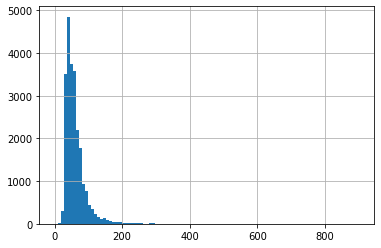

In [60]:
# Гистограмма

data['total_area'].hist(bins=100, range=(0,900))

**Комментарий**: Согласно изученных данным минимальная общая площадь составляет 12 кв.м, а максимальная 900 кв.м. Размах в этих данных довольно большой, однако большая часть значений находится в диапазоне от 12 до 200 кв.м. Пик в гистограмме приходится на медианное значение в 50 кв.м. Можно проверить какое количество значений приходится на квартиры площадью больше 200 кв.м., и, если их не больше 10%, то удалить эти данные.  

In [61]:
# Сохраняем строки с квартирамы больше 200 кв.м в новую переменную
big_flats = data.loc[data['total_area'] > 200]

# Проверяем информацию
big_flats.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 155 to 23491
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            227 non-null    int64         
 1   last_price              227 non-null    float64       
 2   total_area              227 non-null    float64       
 3   first_day_exposition    227 non-null    datetime64[ns]
 4   rooms                   227 non-null    int64         
 5   ceiling_height          227 non-null    float64       
 6   floors_total            227 non-null    int64         
 7   living_area             227 non-null    float64       
 8   floor                   227 non-null    int64         
 9   is_apartment            227 non-null    bool          
 10  studio                  227 non-null    bool          
 11  open_plan               227 non-null    bool          
 12  kitchen_area            227 non-null    float6

**Комментарий**: Очень больших квартир всего 227, для данных в 23650 это меньше 1%, можно удалить их.

In [62]:
# Обработка аномальных значений

data = data.drop(data[data['total_area'] > 200].index)

# Проверяем изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23423 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23423 non-null  int64         
 1   last_price              23423 non-null  float64       
 2   total_area              23423 non-null  float64       
 3   first_day_exposition    23423 non-null  datetime64[ns]
 4   rooms                   23423 non-null  int64         
 5   ceiling_height          23423 non-null  float64       
 6   floors_total            23423 non-null  int64         
 7   living_area             23423 non-null  float64       
 8   floor                   23423 non-null  int64         
 9   is_apartment            23423 non-null  bool          
 10  studio                  23423 non-null  bool          
 11  open_plan               23423 non-null  bool          
 12  kitchen_area            23423 non-null  float6

<AxesSubplot:>

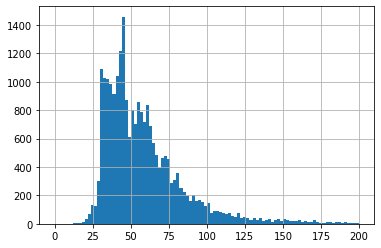

In [63]:
# Построим обновленную гистограмму 

data['total_area'].hist(bins=100, range=(0,200))

**Комментарий**: В диаграмме с удаленными аномальными значениями мы видим, что основной пик приходится не на медианное значение, как нам показалось в начале. В графике заменты несколько вершин, за которыми следуют спады. Вероятно, что это зависит от стандартной площади квартир разной планировки в домах типовой застройки. В целом график выглядит правдоподобно, общая площать большей часть квартир не превышат 75-100 кв.м.

#### Жилая площадь.

In [64]:
# Выведем на экран перечень уникальных значений из столбца 'living_area' 

print('Минимальная жилая площадь:', data['living_area'].min())
print('Максимальная жилая площадь:', data['living_area'].max())
print('Медиана жилой площади:', data['living_area'].median())
print('Количество уникальных значений', len(data['living_area'].unique()))



Минимальная жилая площадь: 2.0
Максимальная жилая площадь: 200.0
Медиана жилой площади: 31.0
Количество уникальных значений 1906


<AxesSubplot:>

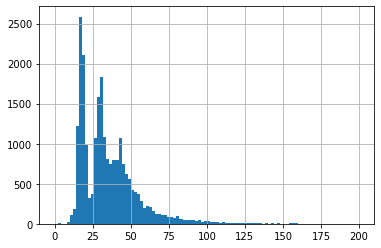

In [65]:
# Гистограмма

data['living_area'].hist(bins=100, range=(0,200))

**Комментарий**: Согласно изученных данным минимальная жилая площадь составляет 2 кв.м, а максимальная 200 кв.м. Большая часть значений находится в диапазоне от 2 до 75 кв.м. В гистограмме мы видим несколько пиков примерно в районе 20 кв.м, 30 кв.м и 40 кв.м. Можно проверить какое количество значений приходится на квартиры с жилой площадью больше 100 кв.м., и, если их немного, то удалить эти данные.

In [66]:
# Сохраняем строки с квартирамы с жилой площадью больше 100 кв.м в новую переменную
big_living = data.loc[data['living_area'] > 100]

# Проверяем информацию
big_living.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 3 to 23448
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            307 non-null    int64         
 1   last_price              307 non-null    float64       
 2   total_area              307 non-null    float64       
 3   first_day_exposition    307 non-null    datetime64[ns]
 4   rooms                   307 non-null    int64         
 5   ceiling_height          307 non-null    float64       
 6   floors_total            307 non-null    int64         
 7   living_area             307 non-null    float64       
 8   floor                   307 non-null    int64         
 9   is_apartment            307 non-null    bool          
 10  studio                  307 non-null    bool          
 11  open_plan               307 non-null    bool          
 12  kitchen_area            307 non-null    float64 

**Комментарий**: Квартир с жилой площадью больше 100 кв.м 307, для данных в 23423 это примерно 1,5%, можно удалить их.

In [67]:
# Обработка аномальных значений

data = data.drop(data[data['living_area'] > 100].index)

# Проверяем изменения
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23116 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23116 non-null  int64         
 1   last_price              23116 non-null  float64       
 2   total_area              23116 non-null  float64       
 3   first_day_exposition    23116 non-null  datetime64[ns]
 4   rooms                   23116 non-null  int64         
 5   ceiling_height          23116 non-null  float64       
 6   floors_total            23116 non-null  int64         
 7   living_area             23116 non-null  float64       
 8   floor                   23116 non-null  int64         
 9   is_apartment            23116 non-null  bool          
 10  studio                  23116 non-null  bool          
 11  open_plan               23116 non-null  bool          
 12  kitchen_area            23116 non-null  float6

<AxesSubplot:>

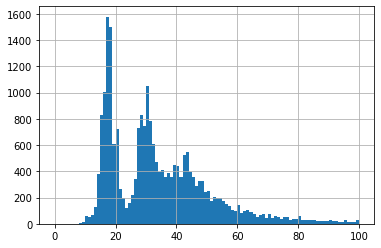

In [68]:
# Построим обновленную гистограмму 

data['living_area'].hist(bins=100, range=(0,100))

**Комментарий**: В диаграмме с удаленными аномальными значениями мы видим такое же распределение данных, как и в первоначальной гистограмме, только более детальное. В графике заменты три вершины, за которыми следуют спады. Вероятно, они обозначают разные типы квартир по размеру жилой площади: студии/однокомнатные (\~18 кв.м.), двухкомнатные (\~30 кв.м.) и трехкомнатные (\~45 кв.м.). Однако, два больших спада в районе 25 кв.м и 35 кв.м. выглядят подозрительно.

#### Площадь кухни.

In [69]:
# Выведем на экран перечень уникальных значений из столбца 'kitchen_area' 

print('Минимальная площади кухни:', data['kitchen_area'].min())
print('Максимальная площади кухни:', data['kitchen_area'].max())
print('Медиана площади кухни:', data['kitchen_area'].median())
print('Количество уникальных значений', len(data['kitchen_area'].unique()))


Минимальная площади кухни: 0.0
Максимальная площади кухни: 117.9
Медиана площади кухни: 9.6
Количество уникальных значений 1464


<AxesSubplot:>

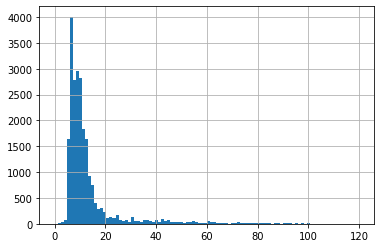

In [70]:
# Гистограмма

data['kitchen_area'].hist(bins=100, range=(0,120))

**Комментарий**: Согласно изученных данным минимальная площадь кухни составляет 0 кв.м (вероятнее всего это студии, где кухня не выделена отдельно), а максимальная 117.9 кв.м. Большая часть значений находится в диапазоне от 0 до 60 кв.м. В гистограмме мы видим самый большой пик примерно в районе медианного значения. Можно проверить какое количество значений приходится на квартиры с площадью кухни больше 60 кв.м., и, если их немного, то удалить эти данные.

In [71]:
# Сохраняем строки с квартирамы с площадью кухни больше 60 кв.м в новую переменную
big_kitchen = data.loc[data['kitchen_area'] > 60]

# Проверяем информацию
big_kitchen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 81 to 23663
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            397 non-null    int64         
 1   last_price              397 non-null    float64       
 2   total_area              397 non-null    float64       
 3   first_day_exposition    397 non-null    datetime64[ns]
 4   rooms                   397 non-null    int64         
 5   ceiling_height          397 non-null    float64       
 6   floors_total            397 non-null    int64         
 7   living_area             397 non-null    float64       
 8   floor                   397 non-null    int64         
 9   is_apartment            397 non-null    bool          
 10  studio                  397 non-null    bool          
 11  open_plan               397 non-null    bool          
 12  kitchen_area            397 non-null    float64

**Комментарий**: Квартир с площадью кухни больше 60 кв.м 397, для данных в 23116  это меньше 2%, можно удалить их.

In [72]:
# Обработка аномальных значений

data = data.drop(data[data['kitchen_area'] > 60].index)

# Проверяем изменения
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22719 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22719 non-null  int64         
 1   last_price              22719 non-null  float64       
 2   total_area              22719 non-null  float64       
 3   first_day_exposition    22719 non-null  datetime64[ns]
 4   rooms                   22719 non-null  int64         
 5   ceiling_height          22719 non-null  float64       
 6   floors_total            22719 non-null  int64         
 7   living_area             22719 non-null  float64       
 8   floor                   22719 non-null  int64         
 9   is_apartment            22719 non-null  bool          
 10  studio                  22719 non-null  bool          
 11  open_plan               22719 non-null  bool          
 12  kitchen_area            22719 non-null  float6

<AxesSubplot:>

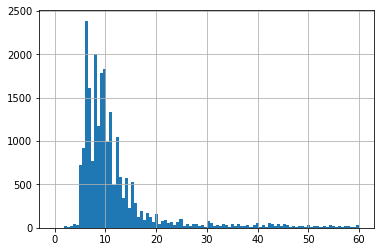

In [73]:
# Построим обновленную гистограмму 

data['kitchen_area'].hist(bins=100, range=(0,60))

**Комментарий**: В диаграмме с удаленными аномальными значениями мы видим такое же распределение данных, как и в первоначальной гистограмме, но более детальное. Также в новом графике стали заменты провалы между пиковыми значениями, природа которых непонятна.

#### Цена объекта.

In [74]:
# Выведем на экран перечень уникальных значений из столбца 'last_price' 

print('Минимальная цена:', data['last_price'].min())
print('Максимальная цена:', data['last_price'].max())
print('Медиана цены:', data['last_price'].median())
print('Количество уникальных значений', len(data['last_price'].unique()))

Минимальная цена: 12190.0
Максимальная цена: 330000000.0
Медиана цены: 4550000.0
Количество уникальных значений 2714


<AxesSubplot:>

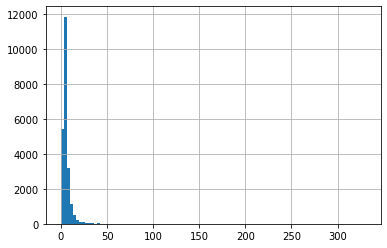

In [75]:
# Разделяем значения на 1,000,000

data_price_mln = data['last_price'] / 1000000

# Гистограмма

data_price_mln.hist(bins=100)

**Комментарий**: Согласно изученных данным минимальная цена составляет 12190, что очень мало, а максимальная 330 млн, что очень много. Размах в этих данных довольно большой, однако большая часть значений находится в диапазоне до 40 млн. Пик в гистограмме присутствует, но определить его значение не имеется возможным из-за аномально больших значений. Можно проверить какое количество значений приходится на квартиры дороже 40 млн., и, если их не больше 10%, удалить эти данные.

In [76]:
# Сохраняем строки с квартирамы ценой больше 40 млн в новую переменную
expensive_flat = data.loc[data['last_price'] > 40000000]

# Проверяем информацию
expensive_flat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 51 to 23574
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            56 non-null     int64         
 1   last_price              56 non-null     float64       
 2   total_area              56 non-null     float64       
 3   first_day_exposition    56 non-null     datetime64[ns]
 4   rooms                   56 non-null     int64         
 5   ceiling_height          56 non-null     float64       
 6   floors_total            56 non-null     int64         
 7   living_area             56 non-null     float64       
 8   floor                   56 non-null     int64         
 9   is_apartment            56 non-null     bool          
 10  studio                  56 non-null     bool          
 11  open_plan               56 non-null     bool          
 12  kitchen_area            56 non-null     float64 

**Комментарий**: Очень дорогих квартир всего 56, можно их удалить.

In [77]:
# Обработка аномальных значений

data = data.drop(data[data['last_price'] > 40000000].index)

# Проверяем изменения
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22663 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22663 non-null  int64         
 1   last_price              22663 non-null  float64       
 2   total_area              22663 non-null  float64       
 3   first_day_exposition    22663 non-null  datetime64[ns]
 4   rooms                   22663 non-null  int64         
 5   ceiling_height          22663 non-null  float64       
 6   floors_total            22663 non-null  int64         
 7   living_area             22663 non-null  float64       
 8   floor                   22663 non-null  int64         
 9   is_apartment            22663 non-null  bool          
 10  studio                  22663 non-null  bool          
 11  open_plan               22663 non-null  bool          
 12  kitchen_area            22663 non-null  float6

<AxesSubplot:>

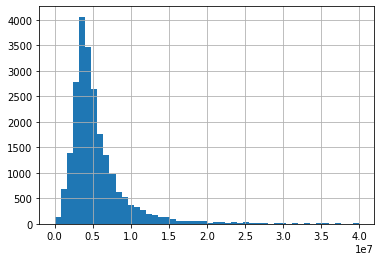

In [78]:
# Построим обновленную гистограмму 

data['last_price'].hist(bins=50)

**Комментарий**: Теперь гистограмма цен квартир выглядит как нормальное распределение. Основная масса значений приходится на диапозон до 15-20 млн.

#### Количество комнат.

In [79]:
# Выведем на экран перечень уникальных значений из столбца 'rooms' 

print('Минимальное количество комнат:', data['rooms'].min())
print('Максимальное количество комнат:', data['rooms'].max())
print('Медиана количества комнат:', data['rooms'].median())
print('Количество уникальных значений', len(data['rooms'].unique()))
data.groupby('rooms').size()

Минимальное количество комнат: 0
Максимальное количество комнат: 7
Медиана количества комнат: 2.0
Количество уникальных значений 8


rooms
0     196
1    8014
2    7799
3    5451
4    1001
5     175
6      22
7       5
dtype: int64

<AxesSubplot:>

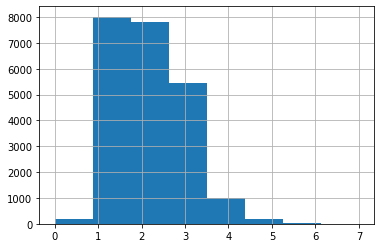

In [80]:
# Гистограмма

data['rooms'].hist(bins=8)


**Комментарий**: Согласно изученных данным минимальное количество комнат - 0, что не имеет смысла, а максимальное 7, но таких квартир всего 5. Можно удалить данные, где количество комнат указано как 0.

In [81]:
# Обработка аномальных значений

data = data.drop(data[data['rooms'] == 0].index)

# Проверяем изменения
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22467 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22467 non-null  int64         
 1   last_price              22467 non-null  float64       
 2   total_area              22467 non-null  float64       
 3   first_day_exposition    22467 non-null  datetime64[ns]
 4   rooms                   22467 non-null  int64         
 5   ceiling_height          22467 non-null  float64       
 6   floors_total            22467 non-null  int64         
 7   living_area             22467 non-null  float64       
 8   floor                   22467 non-null  int64         
 9   is_apartment            22467 non-null  bool          
 10  studio                  22467 non-null  bool          
 11  open_plan               22467 non-null  bool          
 12  kitchen_area            22467 non-null  float6

<AxesSubplot:>

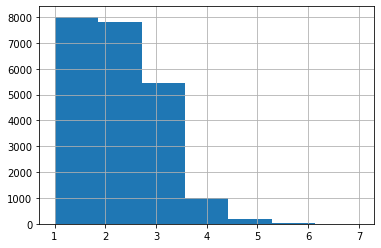

In [82]:
# Построим обновленную гистограмму 

data['rooms'].hist(bins=7)

**Комментарий**: Обновленная гистограмма показывает распределение Пуассона. Большая часть квартир однокомнатные и двухкомнатные.

#### Высота потолков.

In [83]:
# Выведем на экран перечень уникальных значений из столбца 'ceiling_height' 

print('Минимальная высота потолков:', data['ceiling_height'].min())
print('Максимальная высота потолков:', data['ceiling_height'].max())
print('Медиана высоты потолков:', data['ceiling_height'].median())
print('Количество уникальных значений', len(data['ceiling_height'].unique()))
data['ceiling_height'].sort_values().unique()

Минимальная высота потолков: 1.0
Максимальная высота потолков: 100.0
Медиана высоты потолков: 2.65
Количество уникальных значений 167


array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.3 ,   3.31,   3.32,   3.33,
         3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,   3.42,
         3.44,   3.45,   3.46,   3.47,   3.48,   3.49,   3.5 ,   3.51,
      

<AxesSubplot:>

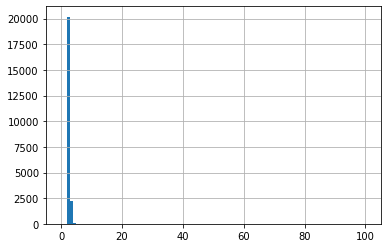

In [84]:
# Гистограмма

data['ceiling_height'].hist(bins=100, range=(0,100))

**Комментарий**: Согласно изученных данным минимальная высота потолков составляет 1 м, что очень мало, а максимальная 100 м, что очень много. Также в столбце указана высота потолков 20 м, 25 м, 32 м и другие. Логично предположить, что на самом деле это значения: 2.5 м и 3.2 м. Такие значения мы обработаем, а значения меньше 2 м и больше 5 м удалим, потому что они выглядят неправдоподобно. 

In [85]:
# Если значение больше 20, то мы делим его на 10
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] /= 10

# Проверяем результат
data['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,
        2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,
        2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,
        2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,
        2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,
        2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,
        2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,
        2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,
        3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,
        3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,
        3.26,  3.27,  3.28,  3.3 ,  3.31,  3.32,  3.33,  3.34,  3.35,
        3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.44,  3.45,  3.46,
        3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,  3.54,  3.55,
        3.56,  3.57,  3.59,  3.6 ,  3.62,  3.63,  3.65,  3.66,  3.67,
        3.68,  3.7 ,

In [86]:
# Обработка аномальных значений

data = data.drop(data[(data['ceiling_height'] < 2) | (data['ceiling_height'] >= 5)].index)

# Проверяем изменения
data['ceiling_height'].sort_values().unique()

array([2.  , 2.2 , 2.25, 2.26, 2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47, 2.48,
       2.49, 2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59,
       2.6 , 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 ,
       2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81,
       2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92,
       2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03,
       3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14,
       3.15, 3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26,
       3.27, 3.28, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38,
       3.39, 3.4 , 3.42, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 , 3.51,
       3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.59, 3.6 , 3.62, 3.63, 3.65,
       3.66, 3.67, 3.68, 3.7 , 3.75, 3.78, 3.8 , 3.83, 3.84, 3.85, 3.88,
       3.9 , 3.93, 3.95, 3.98, 4.  , 4.06, 4.1 , 4.15, 4.19, 4.2 , 4.25,
       4.3 , 4.37, 4.4 , 4.5 , 4.7 , 4.8 ])

<AxesSubplot:>

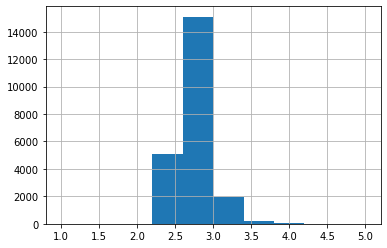

In [87]:
# Построим обновленную гистограмму 

data['ceiling_height'].hist(bins=10, range=(1,5))

**Комментарий**: Диаграмма с удаленными аномальными значениями выглядит более читабельной. Мы видим пик как раз в медианном значении высоты потолков. 

#### Тип этажа квартиры («первый», «последний», «другой»).

Данный столбец мы добавляли в датафрейм самостоятельно, поэтому аномальных значений в нем быть не может, сразу посмотрим гистограмму.

In [88]:
# Выведем на экран перечень и количество уникальных значений из столбца 'floor_type' 

data.groupby('floor_type').size()

floor_type
другой       16487
первый        2801
последний     3166
dtype: int64

<AxesSubplot:>

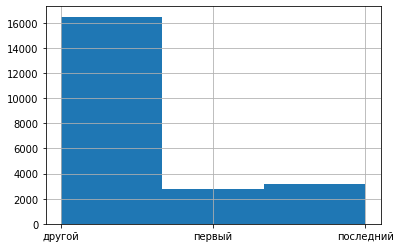

In [89]:
# Гистограмма
data['floor_type'].hist(bins=3)

**Комментарий**: Согласно полученным данным количество квартир на первом и последнем этаже очень близко друг к другу, и оно составляет около четверти всех значений. Оставшиеся квартиры находятся на других этажах.

#### Общее количество этажей в доме.

In [90]:
# Выведем на экран перечень уникальных значений из столбца 'floors_total' 

print('Минимальное количество этажей:', data['floors_total'].min())
print('Максимальное количество этажей:', data['floors_total'].max())
print('Медиана количества этажей:', data['floors_total'].median())
print('Количество уникальных значений', len(data['floors_total'].unique()))
data.groupby('floors_total').size()

Минимальное количество этажей: 1
Максимальное количество этажей: 60
Медиана количества этажей: 9.0
Количество уникальных значений 35


floors_total
1       23
2      364
3      624
4     1093
5     5544
6      797
7      527
8      332
9     3700
10    1124
11     189
12    1322
13     219
14     537
15     349
16    1302
17     797
18     480
19     321
20     256
21     148
22     281
23     338
24     441
25    1015
26     120
27     160
28      21
29       1
33       1
34       1
35      22
36       3
52       1
60       1
dtype: int64

<AxesSubplot:>

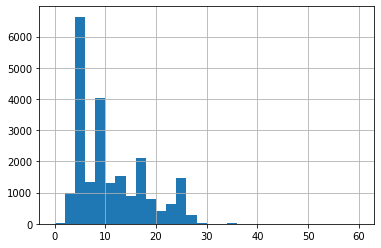

In [91]:
# Гистограмма

data['floors_total'].hist(bins=30, range=(0,60))

**Комментарий**: Согласно изученных данным минимальное количество этажей в домах 1, а максимальное 60. При этом данных о домах выше 30 этажей очень немного, при этом такие дома-небоскребы редкость, поэтому удалим их.

In [92]:
# Обработка аномальных значений

data = data.drop(data[data['floors_total'] > 30].index)

# Проверяем изменения
data['floors_total'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

<AxesSubplot:>

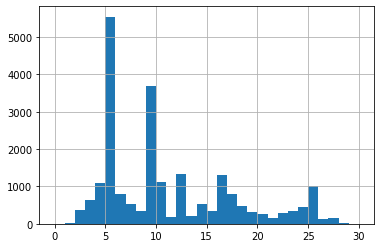

In [93]:
# Построим обновленную гистограмму 

data['floors_total'].hist(bins=30, range=(0,30))

**Комментарий**: По данным обновленной диаграммы видно, что в датафрейме много домов с 5, 9, 10, 12, 16 и 25 этажами, а мало с 1, 8, 11, 13 и 21 этажами. Это можно вполне объяснить типовой застройкой жилых многоэтажек.

#### Расстояние до центра города в метрах.

In [94]:
# Выведем на экран перечень уникальных значений из столбца 'cityCenters_nearest' 

print('Минимальное расстояние до центра города:', data['cityCenters_nearest'].min())
print('Максимальное расстояние до центра города:', data['cityCenters_nearest'].max())
print('Медиана расстояния до центра города:', data['cityCenters_nearest'].median())
print('Количество уникальных значений', len(data['cityCenters_nearest'].unique()))


Минимальное расстояние до центра города: 208.0
Максимальное расстояние до центра города: 65968.0
Медиана расстояния до центра города: 13105.0
Количество уникальных значений 7378


<AxesSubplot:>

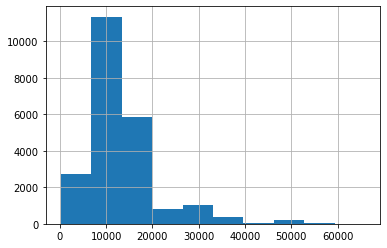

In [95]:
# Гистограмма

data['cityCenters_nearest'].hist(bins=10)

**Комментарий**: Данные в этом столбце заполнялись автоматически с использование геоданных, поэтому каких либо аномальных значений выявить сложно, так как квартиры представлены в различных населенных пунктах. Большая часть квартир находится на расстоянии примерно от 8000 до 13000 от центра города. Вторая по величине группа квартир расположены дальше, в пределах 20000 от центра города.

#### Расстояние до ближайшего парка.

In [96]:
# Выведем на экран перечень уникальных значений из столбца 'parks_nearest' 

print('Минимальное расстояние до парка:', data['parks_nearest'].min())
print('Максимальное расстояние до парка:', data['parks_nearest'].max())
print('Медиана расстояния до парка:', data['parks_nearest'].median())
print('Количество уникальных значений', len(data['parks_nearest'].unique()))


Минимальное расстояние до парка: 1.0
Максимальное расстояние до парка: 3190.0
Медиана расстояния до парка: 454.5
Количество уникальных значений 986


<AxesSubplot:>

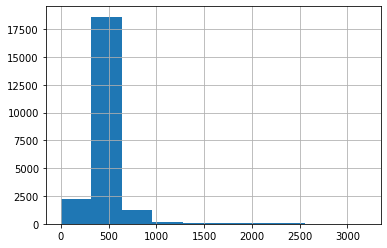

In [97]:
# Гистограмма

data['parks_nearest'].hist(bins=10)

**Комментарий**:  Данные в этом столбце, также как и данные об удаленности от центра города, заполнялись автоматически, аномальных значений здесь выявить сложно. Большая часть квартир находится близко к паркам, на расстоянии примерно от 300 до 600 м.

### Изучим, как быстро продавались квартиры 

Столбец `days_exposition` показывает, сколько дней было размещено каждое объявление.


<AxesSubplot:>

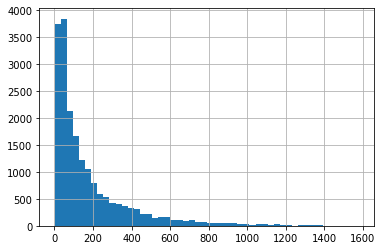

In [98]:
# Гистограмма

data['days_exposition'].hist(bins=50)


In [99]:
# Посчитайте среднее и медиану.
print('Минимальное количество дней размещения:', data['days_exposition'].min())
print('Максимальное количество дней размещения:', data['days_exposition'].max())
print('Медиана количества дней размещения:', data['days_exposition'].median())
print('Среднее количества дней размещения:', data['days_exposition'].mean())

Минимальное количество дней размещения: 1
Максимальное количество дней размещения: 1580
Медиана количества дней размещения: 96.0
Среднее количества дней размещения: 179.4692881007453


<AxesSubplot:>

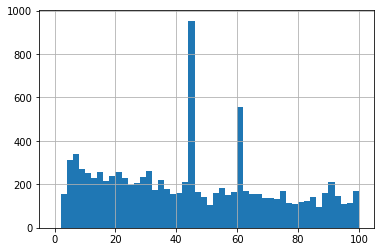

In [100]:
# Гистограмма от 0 до 100 дней.

data['days_exposition'].hist(bins=50, range=(0,100))


**Комментарий**: Согласно изученных данным минимальное количество дней для продажи квартиры - 1, а максимальное - 1580 (больше 4 лет). Среднее количество дней продажи квартир - 169 дней (примерно полгода), а медианное значение - 91 (3 месяца). Таким образом продажа квартиры обычно занимает 3 месяца. Быстрыми можно считать продажи быстрее, чем за 3 месяца, необычно долгими - все продажи дольше 400 дней (чуть больше года).

### Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.

Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).


In [101]:
# Основные статистические показатели (среднее, медиана, стандартное отклонение) для цены и всех остальных числовых факторов:

data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'day_of_week', \
      'month_of_exposition', 'year_of_exposition']].describe()

,last_price,total_area,living_area,kitchen_area,day_of_week,month_of_exposition,year_of_exposition
count,2.242500e+04,22425.000000,22425.000000,22425.000000,22425.000000,22425.000000,22425.000000
mean,5.628003e+06,56.540019,33.259988,11.854699,2.562230,6.394827,2017.374671
std,4.036228e+06,23.522975,15.663054,8.659478,1.790955,3.482809,1.036439
min,1.219000e+04,12.000000,2.000000,1.300000,0.000000,1.000000,2014.000000
25%,3.400000e+06,40.000000,19.000000,7.100000,1.000000,3.000000,2017.000000
50%,4.550000e+06,51.000000,30.500000,9.500000,3.000000,6.000000,2017.000000
75%,6.500000e+06,67.000000,42.600000,12.300000,4.000000,10.000000,2018.000000
max,4.000000e+07,200.000000,100.000000,60.000000,6.000000,12.000000,2019.000000


#### Изучим зависимость цены от общей площади квартиры.

In [102]:
# Сводная таблица для общей площади
pivot_total_area = data.pivot_table(
    index='total_area',
    values='last_price',
    aggfunc='median'
)


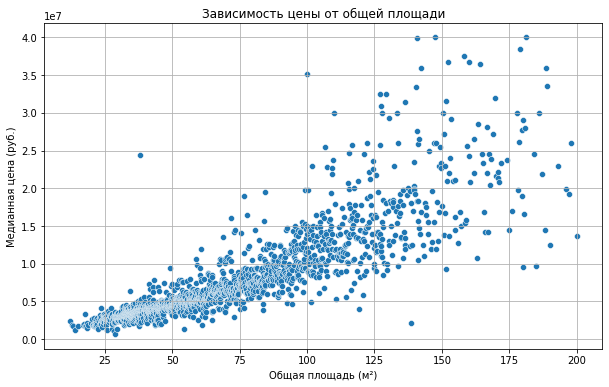

Коэффициент корреляции цены от общей площади: 0.7561008789572123


In [103]:
# График зависимости цены от общей площади

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pivot_total_area.index, y=pivot_total_area['last_price'])
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь (м²)')
plt.ylabel('Медианная цена (руб.)')
plt.grid()
plt.show()

total_area_correlation = data['last_price'].corr(data['total_area'])
print(f'Коэффициент корреляции цены от общей площади: {total_area_correlation}')

**Комментарий**: Зависимость цены от общей площади квартиры высокая. Значение 0.75 указывает на сильную положительную корреляцию между ценой и общей площадью. Это значит, что, с увеличением общей площади квартиры её цена также увеличивается. Основная тенденция заметна для квартир площадью до 100 кв.м. Квартиры большего размера имеют разброс цен гораздо шире. Также на графике можно заметить выбивающиеся от общей тенденции значения. Вероятно, это квартиры в каких-либо элитных жилых комплексах или близкие к центру города.

#### Изучим зависимость цены от жилой площади квартиры.

In [104]:
# Сводная таблица для жилой площади
pivot_living_area = data.pivot_table(
    index='living_area',
    values='last_price',
    aggfunc='median'
)

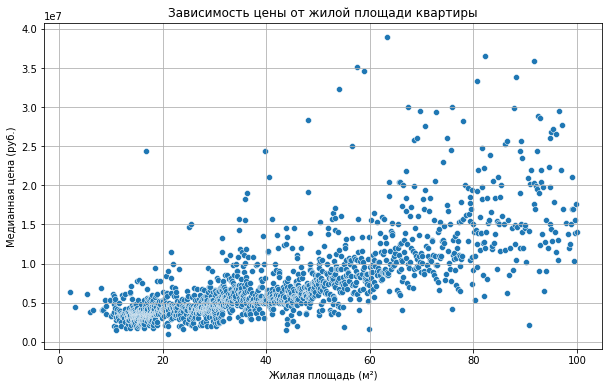

Коэффициент корреляции цены от жилой площади квартиры: 0.603813354826126


In [105]:
# График График зависимости цены от жилой площади

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pivot_living_area.index, y=pivot_living_area['last_price'])
plt.title('Зависимость цены от жилой площади квартиры')
plt.xlabel('Жилая площадь (м²)')
plt.ylabel('Медианная цена (руб.)')
plt.grid()
plt.show()

living_area_correlation = data['last_price'].corr(data['living_area'])
print(f'Коэффициент корреляции цены от жилой площади квартиры: {living_area_correlation}')


**Комментарий**:  Зависимость цены от жилой площади квартиры также прослеживается. Значение 0.6 указывает на умеренную положительную корреляцию между ценой и жилой площадью. Это означает, что, в общем, с увеличением жилой площади квартиры её цена также имеет тенденцию увеличиваться, но эта связь не так сильна, как в случае с общей площадью (где коэффициент был 0.756). Основная тенденция замента для квартир с жилой площадью до 80 кв.м. Для квартир больше разброс цен практически хаотичен. Также на графике можно заметить выбивающиеся от общей тенденции значения. Вероятно, это также могут быть квартиры в каких-либо элитных жилых комплексах или близкие к центру города.

#### Изучим зависимость цены от площади кухни.

In [106]:
# Сводная таблица для площади кухни
pivot_kitchen_area = data.pivot_table(
    index='kitchen_area',
    values='last_price',
    aggfunc='median'
)

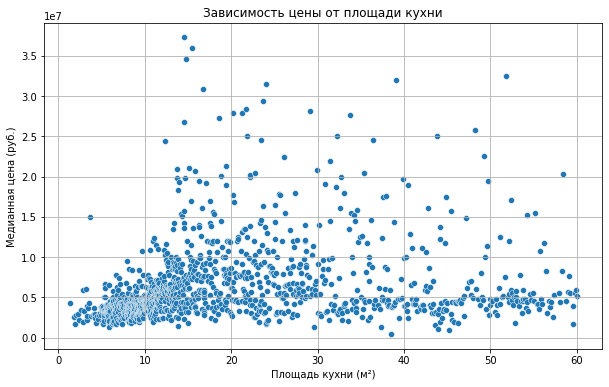

Коэффициент корреляции цены от площади кухни: 0.2709972181757262


In [107]:
# График График зависимости цены от площади кухни

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pivot_kitchen_area.index, y=pivot_kitchen_area['last_price'])
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни (м²)')
plt.ylabel('Медианная цена (руб.)')
plt.grid()
plt.show()


kitchen_area_correlation = data['last_price'].corr(data['kitchen_area'])
print(f'Коэффициент корреляции цены от площади кухни: {kitchen_area_correlation}')

**Комментарий**: Зависимость цены от площади кухни неявная. Значение 0.27 указывает на слабую положительную корреляцию между ценой квартиры и площадью кухни. Это означает, что, в целом, с увеличением площади кухни цена квартиры может немного увеличиваться, но эта связь не является значительной. Слабая корреляция говорит о том, что площадь кухни не является ключевым фактором, влияющим на цену квартиры, по сравнению с другими переменными, такими как общая площадь или жилая площадь.

#### Изучим зависимость цены от количества комнат.

In [108]:
# Сводная таблица для количества комнат
pivot_rooms = data.pivot_table(
    index='rooms',
    values='last_price',
    aggfunc='median'
)

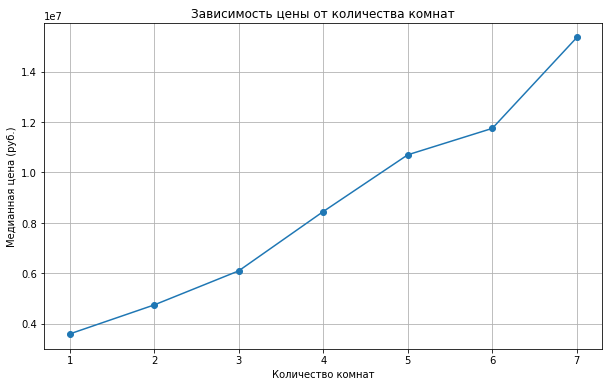

Коэффициент корреляции цены от количества комнат: 0.4510965393865038


In [109]:
# График График зависимости цены от количества комнат

plt.figure(figsize=(10, 6))
plt.plot(pivot_rooms.index, pivot_rooms['last_price'], marker='o')
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Медианная цена (руб.)')
plt.grid()
plt.show()

rooms_correlation = data['last_price'].corr(data['rooms'])
print(f'Коэффициент корреляции цены от количества комнат: {rooms_correlation}')


**Комментарий**: Зависимость цены от количества комнат наблюдается. Значение 0.45 указывает на умеренную положительную корреляцию между ценой квартиры и количеством комнат. Это означает, что, в общем, с увеличением количества комнат цена квартиры также имеет тенденцию увеличиваться. Умеренная корреляция говорит о том, что количество комнат может быть значимым фактором при определении цены квартиры, но не является единственным определяющим параметром. С другой стороны, было бы логично отметить, что увеличение количества комнат в квартире увеличивает и ее общую площадь.

#### Изучим зависимость цены от этажа, на котором расположена квартира (первый, последний, другой).

In [110]:
# Сводная таблица для расположения квартиры
pivot_floor_type = data.pivot_table(
    index='floor_type',
    values='last_price',
    aggfunc='median'
)

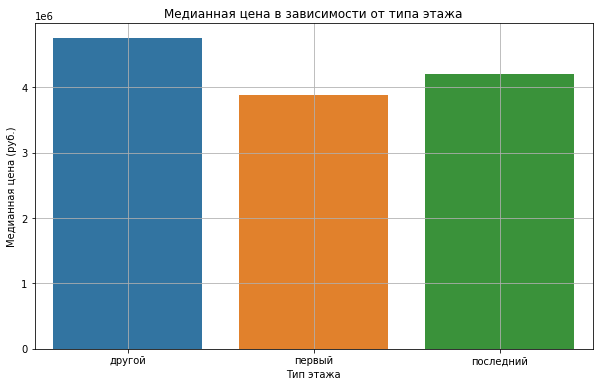

Зависимость цены от этажа, на котором расположена квартира


,last_price
floor_type,
другой,4750000.0
первый,3885000.0
последний,4200000.0


In [111]:
# График зависимости цены от расположения квартиры

plt.figure(figsize=(10, 6))
sns.barplot(x=pivot_floor_type.index, y=pivot_floor_type['last_price'])
plt.title('Медианная цена в зависимости от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Медианная цена (руб.)')
plt.grid()
plt.show()

print('Зависимость цены от этажа, на котором расположена квартира')
display(pivot_floor_type)

**Комментарий**: Зависимость цены от этажа, на котором расположена квартира неявная, так как медианные значения для первого, последнего и остальных этажей близки друг другу. В целом можно отметить, что самые дешевые квартиры находятся на первом этаже, далее идут квартиры на последних этажах, а самая высокая цена у квартир на всех остальных этажах. Это вполне логично, так как первые этажи жилых домов часто используются под коммерческие площади. Также бытует мнение, что вероятность взлома и краж из квартир на первых и последних этажах выше, чем на остальных.


#### Изучим зависимость цены от даты размещения (день недели, месяц, год).

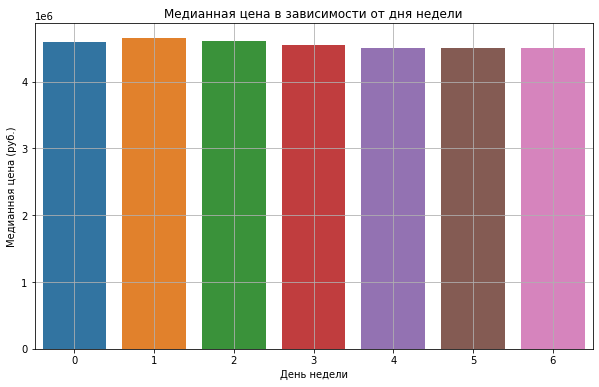

Зависимость цены от дня недели размещения объявления


,last_price
day_of_week,
0,4594500.0
1,4650000.0
2,4600000.0
3,4550000.0
4,4500000.0
5,4500000.0
6,4500000.0


In [112]:
# Сводная таблица для дня недели
pivot_day_of_week = data.pivot_table(
    index='day_of_week',
    values='last_price',
    aggfunc='median'
)

# График зависимости цены от дня недели размещения объявления

plt.figure(figsize=(10, 6))
sns.barplot(x=pivot_day_of_week.index, y=pivot_day_of_week['last_price'])
plt.title('Медианная цена в зависимости от дня недели')
plt.xlabel('День недели')
plt.ylabel('Медианная цена (руб.)')
plt.grid()
plt.show()

print('Зависимость цены от дня недели размещения объявления')
display(pivot_day_of_week)

**Комментарий**: День недели не является значимым фактором при определении цены квартиры. Значения по каждому дню недели практически одинаковые, это означает, что практически нет связи между этими переменными: изменение дня недели размещения объявления не имеет значительного влияния на цену квартиры. 

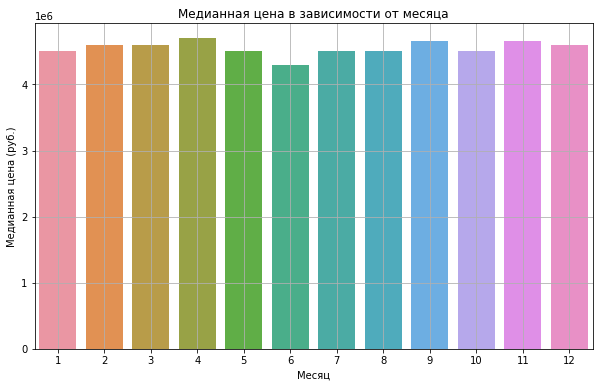

Зависимость цены от месяца размещения объявления


,last_price
month_of_exposition,
1,4500000.0
2,4592500.0
3,4590000.0
4,4700000.0
5,4499000.0
6,4300000.0
7,4500000.0
8,4500000.0
9,4650000.0


In [113]:
# Сводная таблица для месяца 
pivot_month = data.pivot_table(
    index='month_of_exposition',
    values='last_price',
    aggfunc='median'
)

# График зависимости цены от месяца размещения объявления

plt.figure(figsize=(10, 6))
sns.barplot(x=pivot_month.index, y=pivot_month['last_price'])
plt.title('Медианная цена в зависимости от месяца')
plt.xlabel('Месяц')
plt.ylabel('Медианная цена (руб.)')
plt.grid()
plt.show()

print('Зависимость цены от месяца размещения объявления')
display(pivot_month)

**Комментарий**: Месяц размещения объявления также не оказывает практически никакого влияния на цену квартиры. Медианные значения практически одинаковые, это говорит о том, что месяц размещения объявления не является значимым фактором при определении цены квартиры.


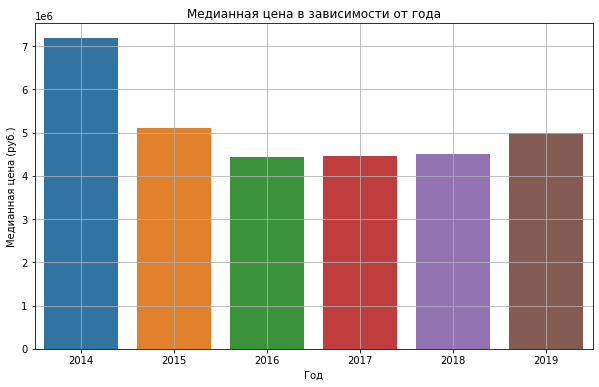

Зависимость цены от года размещения объявления


,last_price
year_of_exposition,
2014,7182500.0
2015,5100000.0
2016,4430000.0
2017,4450000.0
2018,4500000.0
2019,5000000.0


In [114]:
# Сводная таблица для дня недели
pivot_year = data.pivot_table(
    index='year_of_exposition',
    values='last_price',
    aggfunc='median'
)

# График зависимости цены от дня недели размещения объявления

plt.figure(figsize=(10, 6))
sns.barplot(x=pivot_year.index, y=pivot_year['last_price'])
plt.title('Медианная цена в зависимости от года')
plt.xlabel('Год')
plt.ylabel('Медианная цена (руб.)')
plt.grid()
plt.show()

print('Зависимость цены от года размещения объявления')
display(pivot_year)

**Комментарий**: Медианные цены в зависимости от года размещения объявления имеют немного более видимую разницу, чем зависимость от дня недели или месяца. По графику можно отметить, что цены на квартиры в 2014 году были выше, чем в остальные года, это можно объяснить внешними экономическими факторами. В целом изменение года размещения объявления практически не влияет на цену квартиры.

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений


In [115]:
# Создаем сводную таблицу с количеством объявлений и средней ценой квадратного метра 
pivot_table_square_meter = data.pivot_table(
    index='locality_name',
    values='price_per_square_meter',
    aggfunc=['count', 'mean']
).reset_index()

# Переименовываем столбцы для удобства
pivot_table_square_meter.columns = ['locality_name', 'number_of_ads', 'average_price_per_square_meter']

# Отбираем 10 населённых пунктов с наибольшим числом объявлений
top_localities = pivot_table_square_meter.nlargest(10, 'number_of_ads')

location_correlation = top_localities['average_price_per_square_meter'].corr(top_localities['number_of_ads'])
print(f'Коэффициент корреляции средней цены от количества объявлений: {location_correlation} \n')

# Переименовываем столбцы
top_localities.rename(columns={
    'locality_name': 'Название населенного пункта',
    'number_of_ads': 'Количество объявлений',
    'average_price_per_square_meter': 'Средняя цена за квадратный метр (руб.)'
}, inplace=True)

# Выводим результат
print("Топ-10 населённых пунктов с наибольшим числом объявлений")
display(top_localities)

Коэффициент корреляции средней цены от количества объявлений: 0.5902052244188791 

Топ-10 населённых пунктов с наибольшим числом объявлений


,Название населенного пункта,Количество объявлений,Средняя цена за квадратный метр (руб.)
219,Санкт-Петербург,14767,111266.841725
143,Мурино,554,85643.068448
103,Кудрово,444,95293.342297
291,Шушары,423,78577.939362
34,Всеволожск,379,68810.521240
198,Пушкин,352,102883.740937
88,Колпино,334,75288.955030
167,Парголово,314,90785.450127
42,Гатчина,305,68791.027607
35,Выборг,226,58091.826903


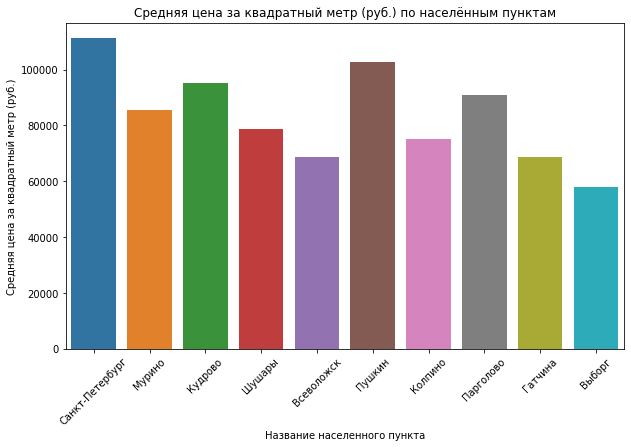

Населенный пункт с самой высокой стоимостью квадратного метра: Санкт-Петербург - 111267₽
Населенный пункт с самой низкой стоимостью квадратного метра: Выборг - 58092₽


In [116]:
# Выделяем населённые пункты с самой высокой и низкой стоимостью квадратного метра

highest_price_index = top_localities['Средняя цена за квадратный метр (руб.)'].idxmax()
highest_price_locality = top_localities.loc[highest_price_index, 'Название населенного пункта']
highest_price = top_localities.loc[highest_price_index, 'Средняя цена за квадратный метр (руб.)']


lowest_price_index = top_localities['Средняя цена за квадратный метр (руб.)'].idxmin()
lowest_price_locality = top_localities.loc[lowest_price_index, 'Название населенного пункта']
lowest_price = top_localities.loc[lowest_price_index, 'Средняя цена за квадратный метр (руб.)']

# Строим график для визуализации

plt.figure(figsize=(10, 6))
sns.barplot(data=top_localities, x='Название населенного пункта', y='Средняя цена за квадратный метр (руб.)')
plt.title('Средняя цена за квадратный метр (руб.) по населённым пунктам')
plt.xlabel('Название населенного пункта')
plt.ylabel('Средняя цена за квадратный метр (руб.)')

# Поворачиваем метки по оси X для лучшей читаемости
plt.xticks(rotation=45)

# Показываем график
plt.show()


print(f'Населенный пункт с самой высокой стоимостью квадратного метра: {highest_price_locality} - {highest_price:.0f}₽')
print(f'Населенный пункт с самой низкой стоимостью квадратного метра: {lowest_price_locality} - {lowest_price:.0f}₽')


**Комментарий**: В Топ-10 населённых пунктов с наибольшим числом объявлений вошли вероятно наиболее крупные населенные пункты Ленинградской области. Населенным пунктом с самой высокой стоимостью квадратного метра очевидно стал Санкт-Петербург, а с самой низкой - Выборг. Значение 0.59 указывает на умеренную положительную корреляцию между средней ценой и количеством объявлений. Это означает, что, в целом, с увеличением количества объявлений средняя цена также имеет тенденцию увеличиваться. Однако это может быть объяснено близостью населенных пунктов к Санкт-Петербургу.

### Средняя цена каждого километра для квартир в Санкт-Петербурге

In [117]:
# Фильтруем данные для Санкт-Петербурга
spb_data = data[data['locality_name'] == 'Санкт-Петербург']

# Группируем данные по расстоянию до центра и вычисляем среднюю цену за квадратный метр
average_price_by_distance = spb_data.groupby('km_cityCenters_nearest')['price_per_square_meter'].mean().reset_index()


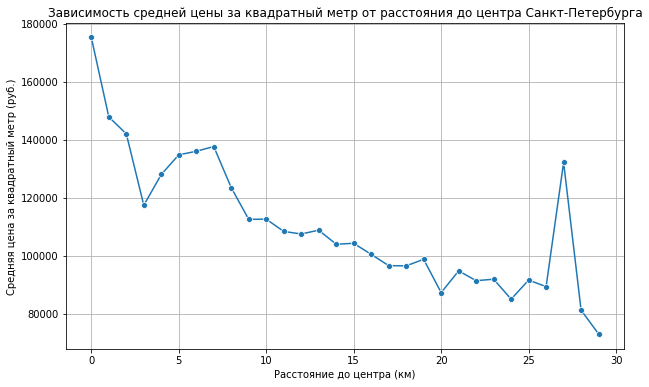

Коэффициент корреляции средней цены за квадратный метр от расстояния до центра Санкт-Петербурга: -0.8257368693679042


In [118]:
# Построение графика

plt.figure(figsize=(10, 6))
sns.lineplot(data=average_price_by_distance, x='km_cityCenters_nearest', y='price_per_square_meter', marker='o')
plt.title('Зависимость средней цены за квадратный метр от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя цена за квадратный метр (руб.)')
plt.grid()
plt.show()

spb_correlation = average_price_by_distance['price_per_square_meter'].corr(average_price_by_distance['km_cityCenters_nearest'])
print(f'Коэффициент корреляции средней цены за квадратный метр от расстояния до центра Санкт-Петербурга: {spb_correlation}')

In [119]:
# Выводим результат таблицы

# Переименовываем столбцы
average_price_by_distance.rename(columns={
    'km_cityCenters_nearest': 'Расстояние до центра (км)',
    'price_per_square_meter': 'Средняя цена за квадратный метр (руб.)'
}, inplace=True)

print("Средняя цена каждого километра для квартир в Санкт-Петербурге")
display(average_price_by_distance)

Средняя цена каждого километра для квартир в Санкт-Петербурге


,Расстояние до центра (км),Средняя цена за квадратный метр (руб.)
0,0.0,175211.540000
1,1.0,147804.260260
2,2.0,141978.096210
3,3.0,117342.581869
4,4.0,127964.569214
5,5.0,134741.357541
6,6.0,135958.693129
7,7.0,137602.892861
8,8.0,123401.246720
9,9.0,112463.172176


**Комментарий**: Расстояние до центра города существенно влияет на цену квартиры. Значение -0.82 указывает на сильную отрицательную корреляцию между средней ценой за квадратный метр и расстоянием до центра города. Это означает, что, в общем, с увеличением расстояния до центра Санкт-Петербурга цена за квадратный метр имеет тенденцию значительно снижаться. Сильная отрицательная корреляция говорит о том, что расстояние до центра является важным фактором, влияющим на стоимость недвижимости. Однако на графике имеется несколько необъяснимых пиков подъема цены для квартир на расстоянии 7 км и 27 км. Вероятно, это какие-то особенные локации с хорошей инфраструктурой, в которых стоимость жилья выше, чем в соседних районах.

**Вывод:**

В текущем разделе мы провели исследовательский анализ данных, который включал в себя изучение ряда параметров объектов недвижимости, построение гистограмм для каждого из них, и обработку редких и выбивающихся значений. В список параметров входили: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего парка.

В дальнейшем мы изучили как быстро продавались квартиры: минимальное количество дней для продажи квартиры - 1, а максимальное - 1580 (больше 4 лет). По средним показателям продажа квартиры обычно занимает от 3 до 6 месяцев. 

В завершении мы выявили ряд зависимостей формирования цены от различных параметров:
1. Сильная положительная корреляция (0.75) между ценой квартиры и общей площадью указывает на то, что увеличение площади квартиры значительно влияет на её стоимость. 
2. Умеренная положительная корреляция (0.6) между ценой и жилой площадью также подтверждает, что увеличение жилой площади приводит к росту цены. 
3. Слабая положительная корреляция (0.27) между ценой и площадью кухни указывает на незначительное влияние этого параметра на стоимость квартиры. 
4. Умеренная положительная корреляция (0.45) между ценой и количеством комнат также подтверждает, что квартиры с большим числом комнат стоят дороже. 
5. Зависимость цены от этажа, на котором расположена квартира, не является явной. Медианные цены для первого, последнего и остальных этажей близки друг к другу. 
6. День недели, месяц и год размещения объявления не оказывают значительного влияния на цену квартиры. 
7. Умеренная положительная корреляция (0.59) между средней ценой и количеством объявлений свидетельствует о том, что в крупных населённых пунктах, таких как Санкт-Петербург, с увеличением числа объявлений цена также имеет тенденцию к росту. Это вполне логично.
8. Сильная отрицательная корреляция (-0.82) между ценой за квадратный метр и расстоянием до центра Санкт-Петербурга подчеркивает, что расстояние является важным фактором, влияющим на стоимость недвижимости. 


## Общий вывод

**Вывод**

Для настоящего проекта нам были предоставлены данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Наша задача — провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

В первом разделе проекта мы изучили общую информацию о данных. Нам для анализа был предоставлен датафрейм объемом 23699 записей, представленый разными типами данных: bool, float64, int64, object. В этом датафрейме 14 колонок имели пропуски, над которыми мы работали далее.

Во втором разделе проекта мы провели основную предобработку данных в датафрейме. Мы обработали пропущенные значения. В зависимости от типа данных заполнили их медианным значением, разностью нескольких параметров, удалили или оставили пропуски. Проверили наличие явных и неявных дубликатов. Привели названия населенных пунктов к единообразному формату. 

В третьем разделе проекта мы добавили 6 новых столбцов по следующим параметрам: цена одного квадратного метра; день недели публикации объявления; месяц публикации объявления; год публикации объявления; тип этажа квартиры (значения — «первый», «последний», «другой»); расстояние до центра города в километрах. 

В четвертом, заключительном разделе проекта мы непосредственно провели исследовательский анализ данных, который включал изучение ряда параметров объектов недвижимости, построение гистограмм для каждого из них, и обработку редких и выбивающихся значений. 
Мы изучили как быстро продавались квартиры, и по средним показателям продажа квартиры обычно занимает от 3 до 6 месяцев. 
Среди ТОП-10 населенных пунктов с самым большим количеством объявлений, самая высокая стоимостью квадратного метра в Санкт-Петербурге (111267₽), а самая низкая в Выборге (58092₽) 

Основные параметры, влияющие на стоимость объектов недвижимости по результатам анализа данных:
- *Общая площадь.* Увеличение площади квартиры значительно влияет на её стоимость. Это означает, что покупатели готовы платить больше за более просторные квартиры. 
- *Жилая площадь.* Увеличение жилой площади приводит к росту цены, но эта зависимость менее выражена по сравнению с общей площадью, особенно для квартир с жилой площадью до 80 кв.м.
- *Количество комнат.* Квартиры с большим числом комнат стоят дороже, что логично, чем больше комнат, тем больше площадь. Это может быть связано с потребностями семей, которые ищут большее количество спален. 
- *Тип этажа квартиры.* Зависимость цены от этажа, на котором расположена квартира, не является явной. Медианные цены для первого, последнего и остальных этажей близки друг к другу. Однако, в целом, квартиры на первом этаже имеют самые низкие цены, а на остальных этажах — более высокие, что может быть связано с восприятием безопасности и удобства.  
- *Расстояние до центра города.* Расстояние является важным фактором, влияющим на стоимость недвижимости. С увеличением расстояния цена существенно снижается, хотя имеются исключения для некоторых локаций, где цены выше по неявным причинам.

Такие параметры как площадь кухни, день недели, месяц и год размещения объявления не оказывают существенного влияния на цену объектов недвижимости. Увеличение площади кухни может немного повысить цену, но это влияние не является значительным.

В качестве рекомендаций можно предложить для более точного определения рыночной стоимости объектов недвижимости также учитывать ряд других параметров. Например, состоянием квартиры (новизна или ремонт), так квартиры в хорошем состоянии имеют более высокую стоимость. Покупатели готовы платить больше за готовые к проживанию объекты. Другой немаловажный параметр, который можно было бы рассмотреть более детально - инфраструктура. Данные не только о близости к паркам и водоемам, но и к школам, детским садам, станциям метро и остановкам общественного транспорта. Расположение домов в районах с развитой инфраструктурой увеличивает стоимость недвижимости. 

Таким образом, анализ зависимости цены квартир в Санкт-Петербурге и его окрестностях от различных параметров показывает, что ключевыми факторами, влияющими на стоимость, являются общая и жилая площадь, а также расстояние до центра города. Менее значительными являются площадь кухни и этаж, на котором расположена квартира. Дата размещения объявления практически не влияет на цену. Анализ корреляции между средней ценой за квадратный метр и различными параметрами позволяет глубже понять рынок недвижимости. Это знание может быть полезным для всех участников рынка, включая покупателей, продавцов и инвесторов, и поможет в принятии более обоснованных решений.
   